<a href="https://colab.research.google.com/github/athu-lya/Assignment1/blob/main/Assignment_on_Classification_Athulya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment on Classificatio**n

Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the
classification algorithms discussed in the session)

In [357]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
#importing the dataset
iris=pd.read_excel('/content/iris (1).xls')

In [359]:
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [360]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [361]:
iris.shape

(150, 5)

In [362]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [363]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [364]:
iris.SL.skew()

0.3068227108046868

In [365]:
iris.fillna(iris.median(), inplace=True)

<ipython-input-365-5fc9f6ae4fef>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.fillna(iris.median(), inplace=True)


In [366]:
iris.SW.skew()

0.3992861923982765

In [367]:
iris.fillna(iris.median(), inplace=True)

<ipython-input-367-5fc9f6ae4fef>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.fillna(iris.median(), inplace=True)


In [368]:
iris.PL.skew()

-0.3125678285137702

In [369]:
iris.fillna(iris.median(), inplace=True)

<ipython-input-369-5fc9f6ae4fef>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.fillna(iris.median(), inplace=True)


In [370]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

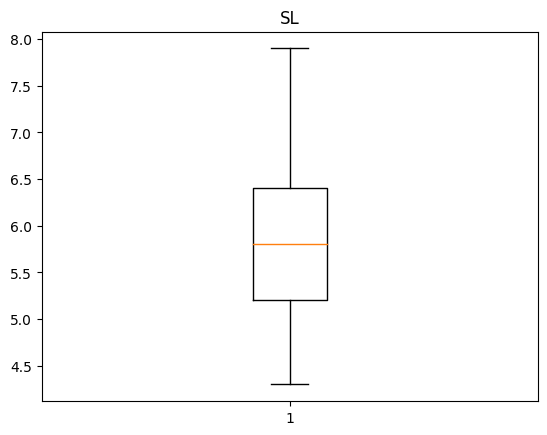

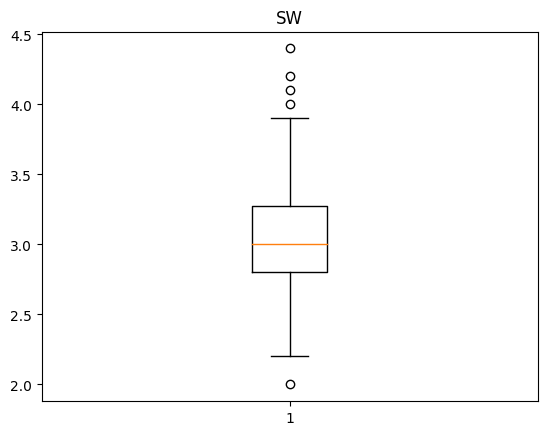

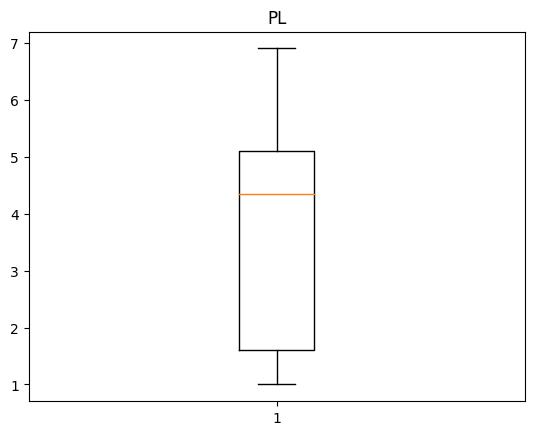

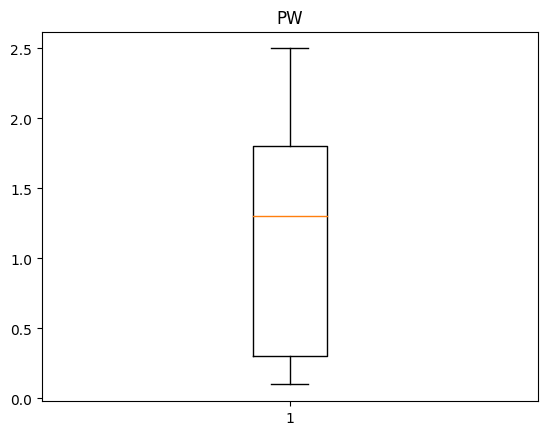

In [371]:
num_columns =['SL', 'SW', 'PL','PW']
for i in num_columns:
  plt.figure()
  plt.boxplot(iris[i])
  plt.title(i);

outliers in SW

In [372]:
from scipy.stats import zscore
z_scores = zscore(iris.SW)

threshold =2
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
outlier_indices

array([  5,  14,  15,  16,  32,  33,  60,  62,  68, 119])

In [373]:
iris.iloc[outlier_indices]

,SL,SW,PL,PW,Classification
5,5.4,3.9,1.7,0.4,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica


In [374]:
iris.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [375]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris.Classification = label_encoder.fit_transform(iris.Classification)
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [376]:
data = iris.drop(outlier_indices)
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
10,5.4,3.0,1.5,0.2,0


In [377]:
iris.Classification.value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [378]:
X = iris.drop('Classification', axis=1)
y = iris.Classification

In [379]:
scaled_X = pd.DataFrame()
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_data, columns=X.columns)
scaled_X.head()

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.416667,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [380]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [381]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [382]:
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

log_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [383]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [384]:
confusion_matrix(y_test,log_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [385]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred,average='weighted'))
print('recall:',recall_score(y_test,log_pred,average='weighted'))
print('F1:',f1_score(y_test,log_pred,average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
recall: 0.9666666666666667
F1: 0.9664109121909632


In [386]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [387]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  knn_pred=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

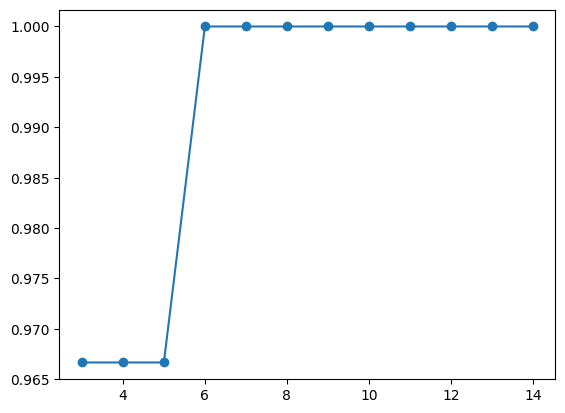

In [388]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel=('neighbors')
plt.ylabel=('Metric k')

In [389]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [390]:
confusion_matrix(y_test,knn_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [391]:
print('Accuracy:',accuracy_score(y_test,knn_pred))
print('Precision:',precision_score(y_test,knn_pred,average='weighted'))
print('recall:',recall_score(y_test,knn_pred,average='weighted'))
print('F1:',f1_score(y_test,knn_pred,average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
recall: 0.9666666666666667
F1: 0.9664109121909632


In [392]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')
sv_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [393]:
y_pred=sv_clf.predict(X_test)

In [394]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [395]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred,average='weighted'))
print('recall:',recall_score(y_test,log_pred,average='weighted'))
print('F1:',f1_score(y_test,log_pred,average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
recall: 0.9666666666666667
F1: 0.9664109121909632


In [396]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [397]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred,average='weighted'))
print('recall:',recall_score(y_test,log_pred,average='weighted'))
print('F1:',f1_score(y_test,log_pred,average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
recall: 0.9666666666666667
F1: 0.9664109121909632


In [398]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [399]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [400]:
y_pred=rf_clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred,average='weighted'))
print('recall:',recall_score(y_test,log_pred,average='weighted'))
print('F1:',f1_score(y_test,log_pred,average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
recall: 0.9666666666666667
F1: 0.9664109121909632


In [401]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [402]:
lr_model.score(X_test,y_test)

0.9666666666666667

In [403]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
def evaluate_model(model,x_=X_test, y_=y_test):
  '''
  Evaluate the various metrics of the classification model
  Takes model, X,y as input'''
  class_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
  y_pred = model.predict(x_)
  print(f"Accuracy score : {accuracy_score(y_,y_pred)}")
  print(f"Precison score : {precision_score(y_,y_pred, average='weighted')}")
  print(f"Recall score : {recall_score(y_,y_pred,average='weighted')}")
  print(f"F1 score:",f1_score(y_,y_pred,average='weighted'))
  conf_df = pd.DataFrame(confusion_matrix(y_,y_pred), index=class_names, columns=class_names)
#evaluating the logistic regression model
evaluate_model(lr_model)

Accuracy score : 0.9666666666666667
Precison score : 0.9694444444444444
Recall score : 0.9666666666666667
F1 score: 0.9664109121909632


In [404]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
evaluate_model(knn_classifier)


Accuracy score : 0.9666666666666667
Precison score : 0.9694444444444444
Recall score : 0.9666666666666667
F1 score: 0.9664109121909632


In [405]:
from sklearn.svm import SVC
sv_classifier = SVC()
sv_classifier.fit(X_train, y_train)
evaluate_model(sv_classifier)


Accuracy score : 0.9666666666666667
Precison score : 0.9694444444444444
Recall score : 0.9666666666666667
F1 score: 0.9664109121909632


In [406]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
evaluate_model(dt_clf)

Accuracy score : 1.0
Precison score : 1.0
Recall score : 1.0
F1 score: 1.0


In [407]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

evaluate_model(rf_clf)

Accuracy score : 1.0
Precison score : 1.0
Recall score : 1.0
F1 score: 1.0


Decision Tree classifier and Random Forest classifier giving the best result